In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [35]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    x_poly = build_poly(x, degree)
    loss_tr, loss_te = [], []
    for k_ in range(k):
        x_poly_test, y_test = x_poly[k_indices[k_]], y[k_indices[k_]]
        train_indices = np.concatenate((k_indices[:k_].flatten(), k_indices[k_+1:].flatten()))
        x_poly_train, y_train = x_poly[train_indices], y[train_indices]
        mse_tr, w = ridge_regression(y_train, x_poly_train, lambda_)
        mse_te = compute_mse(y_test, x_poly_test, w)
        loss_tr.append(np.sqrt(mse_tr))
        loss_te.append(np.sqrt(mse_te))
    return np.mean(loss_tr), np.mean(loss_te)

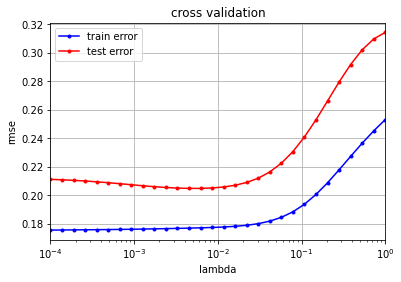

In [36]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

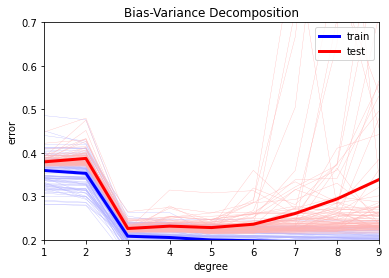

In [38]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        for idx_degree, degree in enumerate(degrees):
            x_poly = build_poly(x, degree)
            x_train, y_train, x_test, y_test = split_data(x_poly, y, ratio_train, seed)
            mse_tr, w = least_squares(y_train, x_train)
            mse_te = compute_mse(y_test, x_test, w)
            rmse_tr[index_seed][idx_degree] = np.sqrt(mse_tr)
            rmse_te[index_seed][idx_degree] = np.sqrt(mse_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()